# Projeto 2 de Ciência dos Dados

Integrantes:
- Barbara Martins Damasceno
- Daniel Costa Delattre 
- Guilherme Augusto Carvalho

## Objetivo
pipipi popopo 
**Pergunta que queremos responder**


Carregando algumas bibliotecas:

In [290]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os, csv, string, re

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

Verificando o diretório

In [291]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/home/daniel/Desktop/Materias/cdados/house-prediction-cdados


Carregando a base de dados de teste e de treino:

In [292]:
dados = pd.read_csv('kc_house_data.csv')
#dadosteste = pd.read_csv('t1.xlsx', sheet_name='Teste')

In [293]:
dados

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Text(0.5, 1.0, 'Histograma do preço')

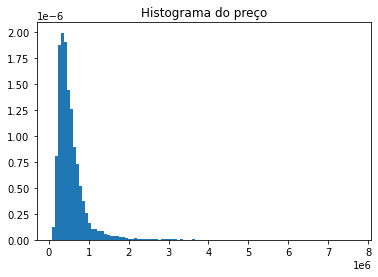

In [294]:
plt.hist(dados.price,bins=100,density=True)
plt.title('Histograma do preço')

"\nplt.subplot(3, 2, 2)\nplt.scatter(dados.price, dados.bathrooms)\nplt.title('Preço x Número de banheiros')\nplt.xlabel('Preço')\nplt.ylabel('Número de banheiros')"

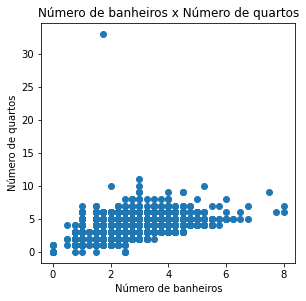

In [295]:
#Analisando a relação entre o preço e algumas variáveis

fig = plt.figure(figsize=(10, 15))
# Ativando subplot...
#Com X colunas e Y linhas
plt.subplot(3, 2, 1)
plt.scatter(dados.bathrooms, dados.bedrooms)
plt.title('Número de banheiros x Número de quartos')
plt.xlabel('Número de banheiros')
plt.ylabel('Número de quartos')

"""
plt.subplot(3, 2, 2)
plt.scatter(dados.price, dados.bathrooms)
plt.title('Preço x Número de banheiros')
plt.xlabel('Preço')
plt.ylabel('Número de banheiros')"""


In [296]:
#dados = dados[dados.price<=2000000]

In [297]:
dados.columns
# features = ['bedrooms', 'bathrooms', 'sqft_living',
#        'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
#        'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15',
#        'lat', 'long',]

features = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [298]:
y = dados.price

In [299]:
x = dados[features]

In [300]:
#printando pra ter ideia dos preços
milhares = y/1000
milhares.describe()

count    21613.000000
mean       540.088142
std        367.127196
min         75.000000
25%        321.950000
50%        450.000000
75%        645.000000
max       7700.000000
Name: price, dtype: float64

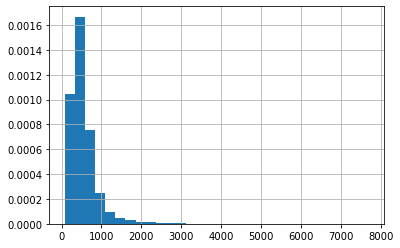

In [301]:
milhares.hist(bins=30,density=True)

In [302]:
xtreino,validacaox,treinoy,validacaoy = train_test_split(x, y, random_state=1)

In [303]:
# Specify Model
modelo_decisiontree = DecisionTreeRegressor(random_state=1)
# Fit Model
modelo_decisiontree.fit(xtreino, treinoy)

DecisionTreeRegressor(random_state=1)

In [304]:
# Make validation predictions and calculate mean absolute error
val_predictions = modelo_decisiontree.predict(validacaox)
val_mae = mean_absolute_error(val_predictions, validacaoy)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE when not specifying max_leaf_nodes: 1,454


In [307]:
# Using best value for max_leaf_nodes
modelo_decisiontree = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
modelo_decisiontree.fit(xtreino, treinoy)
val_predictions = modelo_decisiontree.predict(validacaox)
val_mae = mean_absolute_error(val_predictions, validacaoy)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE for best value of max_leaf_nodes: 5,343


In [306]:
modelo_randomforest = RandomForestRegressor(random_state=1)
modelo_randomforest.fit(xtreino, treinoy)
rf_predict = modelo_randomforest.predict(validacaox)
rf_mae = mean_absolute_error(rf_predict, validacaoy)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 89
